## 정규표현식(Regular Expressions)
- 특정한 규칙을 가진 문자열의 집합을 표현할때 사용
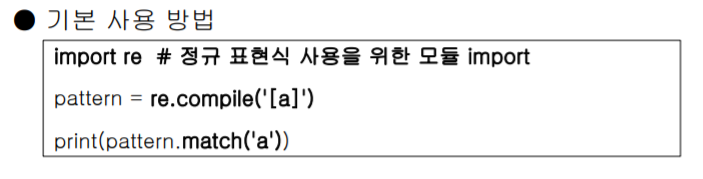

- 패턴을 만들고, 문자열 'a'가 패턴에 맞는지 안맞는지 검사

###  [1. 문자열](#1.문자열)

#### 문자 매치
> [abc]
- 해당 문자안에 a또는 b또는 c가 있는지
- ^ : not

- [a-z] : 모든 알파벳
- [0-9] : 모든 숫자
- [가-힇] : 모든 한글
- [0-3a-dA-D] # 0 ~ 3, a ~ d, A ~ D
- [^abc] # a 또는 b 또는 c 가 아닌 문자
- [^0-9] # 0 부터 9까지 모든 숫자를 제외한 문자
- [^0-3a-dA-D] # 0 ~ 3, a ~ d, A ~ D 를 제외한 문자

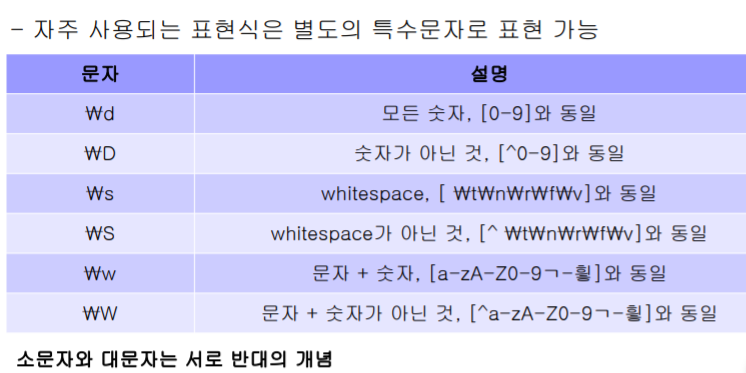

- . :문자 하나를 의미
    - [.] : .자체를 의미
- $*$ : 바로 앞의 문자가 0 ~ N번 등장하는 경우 매치
- Plus(+) : 바로 앞의 문자가 1 ~ N번 등장하는 경우 매치
-  {m} : 해당 문자가 m번 등장하는 경우 매치
- {m, n} : 해당 문자가 m번 ~ n번 등장하는 경우 매치
- ? : 해당 문자가 0번 또는 1번 등장하는 경우 매치 ({0,1} 과 같음)


- ^ : 시작
    - [^abc] : 부정
- $ : 종료
-  | : 두 패턴 중 하나 (or)
-  () ; 정규식 그룹화 (제어하고 싶은 부분 그룹화)
- (?P<그룹명>) : 정규식 그룹화 - name


[연습문제 바로가기](#연습문제)

#### 1.문자열

In [5]:
import re
pat = re.compile('[abc]')
s = 'apython'
print(pat.match(s))

<re.Match object; span=(0, 1), match='a'>


In [12]:
import re
pat = re.compile('[a-z0-9]')
s = 'RR'
if pat.match(s):
    print(True)
else:
    print(False)

False


#### 연습문제:  주민등록번호 형식이 맞는지 확인하는 정규식 만들기
ㅇ 조건
 - 앞자리 숫자 6개 / 뒷자리 숫자 7개
 - 뒷자리의 시작 숫자는 1 ~ 4

In [21]:
import re
text = '791111-1234567'
regex = '[0-9]{6}-([1-4]\d{6})'
pattern = re.compile(regex)
res = pattern.match(text)
print(res)
print("="*10)
print(res.group(1))

<re.Match object; span=(0, 14), match='791111-1234567'>
1234567


#### 2. 은행 계좌번호 형식이 맞는지 확인하는 정규식 만들기
ㅇ 조건
 - 숫자 3자리-숫자 2자리-숫자 6자리
 - 첫번째 3자리 숫자의 시작은 반드시 1
 - 두번째 2자리 숫자의 시작은 반드시 1


In [18]:
import re
text = '123-12-123456'
regex = '1\d{2}-1\d{1}-\d{6}'
pattern = re.compile(regex)
res = pattern.match(text)
print(res)


<re.Match object; span=(0, 13), match='123-12-123456'>


#### 연습문제

####  문자열의 내용이 특정 형식에 맞는지 확인하는 정규식 만들기
ㅇ 조건
 - '안녕하세요' 라는 문자열로 시작
 - 내용 중 '열심히' 라는 문자열 반드시 포함
 - '감사합니다.' 라는 문자열로 종료


In [57]:
import re
text = '안녕하세요. 저는 OOO에서 태어났고... 열심히 하겠습니다. 감사합니다.'
regex = '^안녕하세요.*열심히.*감사합니다[.]$'
pattern = re.compile(regex)
res = pattern.match(text)
print(res)

<re.Match object; span=(0, 41), match='안녕하세요. 저는 OOO에서 태어났고... 열심히 하겠습니다. 감사합니다.'>


In [66]:
import re
text = '이름:꼬렙, 전화번호:1234'
regex = '이름:(.*), 전화번호:(.*)'
pattern = re.compile(regex)
res = pattern.match(text)
print(res.group(1))
print(res.group(2))

꼬렙
1234


In [78]:
import re
text = '이름:꼬렙, 전화번호:1234'
regex = '이름:(\w+), 전화번호:(\d+)'
pattern = re.compile(regex)
res = pattern.match(text)
print(res.group(1))
print(res.group(2))

꼬렙
1234


####  숫자 2자리 + 영어 소문자 2자리 + 숫자 4자리로 구성되었는지 확인하는 정규식 만들기

In [79]:
import re
text = '12ab1234'
regex = '[0-9]{2}[a-z]{2}[0-9]{4}'
pattern = re.compile(regex)
res = pattern.match(text)
print(res)


<re.Match object; span=(0, 8), match='12ab1234'>


#### 영어와 숫자로만 구성되어 있는지 확인하는 정규식 만들기


In [109]:
import re
text = 'abcd1234'
regex = '^[0-9a-zA-Z]+$'
pattern = re.compile(regex)
res = pattern.match(text)
print(res)

None


In [117]:
import re
text = 'ab가cd1234'
regex = '^[0-9a-zA-Z^가-힇]+$'
pattern = re.compile(regex)
res = pattern.match(text)
print(res)

<re.Match object; span=(0, 9), match='ab가cd1234'>


#### 문자열 중 사업자등록번호만 확인하는 정규식 만들기

ㅇ 조건
 - 숫자 3자리-숫자 2자리-숫자8자리

In [ ]:
import re
text = '대표자 : 꼬렙 사업자등록번호 : 100-99-23242324 대표전화 : 051-1234-5678'
regex = '(\d{3}-\d{2}-\d{8}): '
pattern = re.compile(regex)
res = pattern.search(text)
print(res)

In [138]:
import re
text = '#서울 #강남 #맛집 #쭈꾸미'
regex = '#(\w+)\s+'
pattern = re.compile(regex)
res = pattern.search(text)
print(res)

<re.Match object; span=(0, 4), match='#서울 '>


### findall: 괄호 안에 있는 요소만 찾아줌
### finditer: 괄호 뿐만 아니라 모든 객체 찾아줌

In [131]:
import re
text = '1번 a@a.com 2번 b@b.org 3번 c@c.net'
regex = '\w+@\w+[.](com|net)'
pattern = re.compile(regex)
res = pattern.findall(text)
print(res)

['com', 'net']


In [136]:
import re
text = '1번 a@a.com 2번 b@b.org 3번 c@c.net'
regex = '\w+@\w+[.](com|net)'
pattern = re.compile(regex)
res = pattern.finditer(text)

for it in res:
    print(it)

<re.Match object; span=(3, 10), match='a@a.com'>
<re.Match object; span=(25, 32), match='c@c.net'>


In [145]:
import re
text = '010-8478-8181'
regex = '(\d{3})-\d{4}-(\d{4})'
pattern = re.compile(regex)
change = '\g<1>-****-\g<2>'
res = pattern.sub(change, text)
print(res)

010-****-8181


In [151]:
import re
user_list = ['ggoreb@naver.com', 'seorab@gmail.com', 'human@ggoreb.com']
regex = '(\w+@)\w+([.]com)'
pattern = re.compile(regex)
change = '\g<1>*****\g<2>'
for user in user_list:
    res = pattern.sub(change, user)
    print(res)

ggoreb@*****.com
seorab@*****.com
human@*****.com


### 로또번호

In [152]:
import requests
result = requests.get('https://dhlottery.co.kr/gameResult.do?method=byWin')
result.encoding = 'utf-8'
# result.text



In [155]:
import re
pat = re.compile('lrg\s+ball.+>(\d+)+</span>')
pat.findall(result.text)

['1', '15', '17', '23', '25', '41', '10']